In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

df = pd.read_table('foo/RPi4B2GB1_1200MHz_res_usage_data_rvp_pattern_48hr_2.tab',
                   parse_dates=['time_stamp'],
                   index_col='time_stamp',
                )

/tmp/ipykernel_1375784/2902030365.py:6: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_table('foo/RPi4B2GB1_1200MHz_res_usage_data_rvp_pattern_48hr_2.tab',


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34543 entries, 2022-04-26 16:39:36 to 2022-04-28 16:40:18
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               34543 non-null  float64
 1   cpu_freq           34543 non-null  float64
 2   cpu                34543 non-null  float64
 3   cpu_user_time      34543 non-null  float64
 4   cpu_system_time    34543 non-null  float64
 5   cpu_idle_time      34543 non-null  float64
 6   memory             34543 non-null  float64
 7   net_sent           34543 non-null  int64  
 8   net_recv           34543 non-null  int64  
 9   net_upload_rate    34543 non-null  float64
 10  net_download_rate  34543 non-null  float64
 11  temp               34543 non-null  float64
 12  wifi_freq          34543 non-null  int64  
 13  bit_rate           34543 non-null  int64  
 14  link_quality       34543 non-null  int64  
 15  link_quality_max   34543 non-null  

In [100]:
df.state.unique()

array(['mining', 'augmented_reality', 'idle', 'stream'], dtype=object)

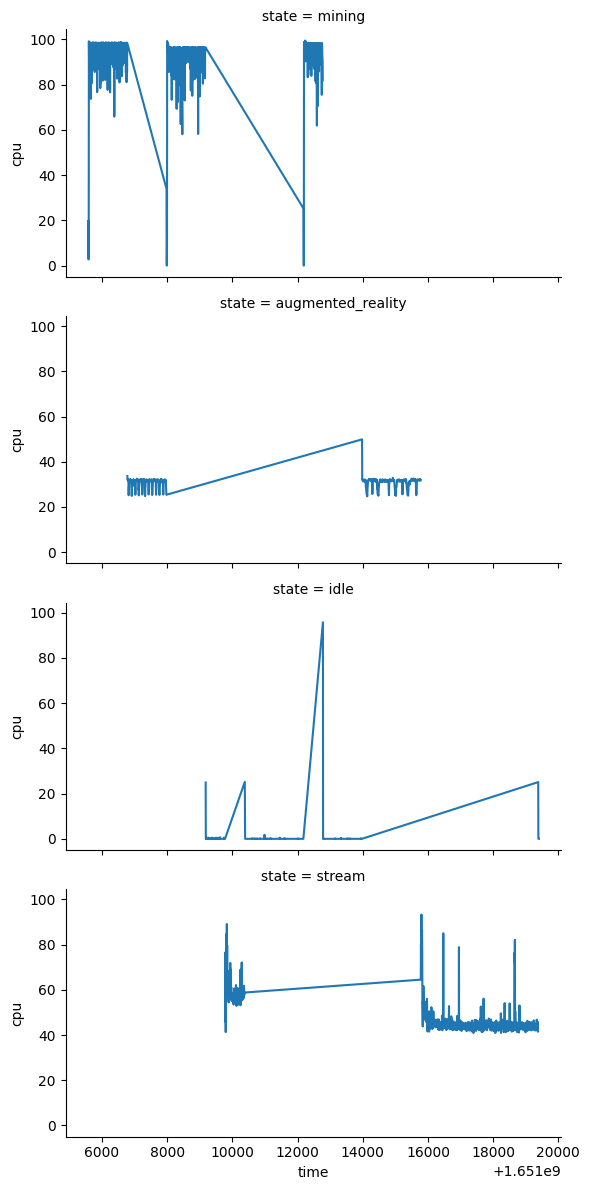

In [110]:
plotdf = df[df.time < df.time.quantile(0.08)]
g = sns.FacetGrid(plotdf, row='state', aspect=2/1)
g.map(sns.lineplot, 'time', 'cpu')
plt.show()

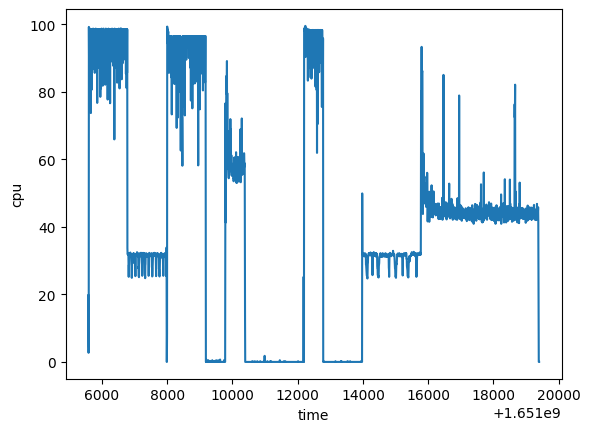

3449

In [111]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

gc.collect()


plotdf = df[(df.time < df.time.quantile(0.08))]
ax = sns.lineplot(plotdf, x='time', y='cpu')
plt.show()

gc.collect()

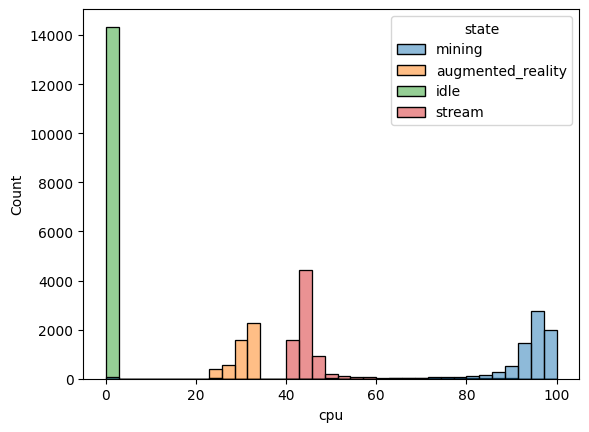

In [116]:
sns.histplot(df, x='cpu', hue='state')
plt.show()

In [108]:
state_seq = []
cur = ''
for row in df.state:
    if cur != row:
        cur = row
        state_seq.append(cur)

state_seq[:10]

['mining',
 'augmented_reality',
 'mining',
 'idle',
 'stream',
 'idle',
 'mining',
 'idle',
 'augmented_reality',
 'stream']

In [109]:
df.head()

,time,cpu_freq,cpu,cpu_user_time,cpu_system_time,cpu_idle_time,memory,net_sent,net_recv,net_upload_rate,net_download_rate,temp,wifi_freq,bit_rate,link_quality,link_quality_max,signal_level,gpu,gpu_mem,state,net
time_stamp,,,,,,,,,,,,,,,,,,,,,
2022-04-26 16:39:36,1.651006e+09,1200.0,19.7,478123.71,34411.95,2315639.17,22.1,119550905,2580618413,0.000000e+00,0.000000e+00,50.147,0,0,0,0,0,0,0,mining,NaN
2022-04-26 16:39:42,1.651006e+09,1200.0,4.5,478124.64,34412.25,2315661.97,23.0,119800395,2580657988,4.099593e-04,6.502922e-05,50.634,0,0,0,0,0,0,0,mining,NaN
2022-04-26 16:39:47,1.651006e+09,600.0,2.7,478124.74,34412.34,2315681.78,22.9,119802599,2580664340,4.404468e-06,1.269382e-05,50.634,0,0,0,0,0,0,0,mining,NaN
2022-04-26 16:39:52,1.651006e+09,1200.0,4.0,478124.83,34412.46,2315701.46,23.0,119802957,2580664830,7.154156e-07,9.792001e-07,50.634,0,0,0,0,0,0,0,mining,NaN
2022-04-26 16:39:57,1.651006e+09,1200.0,99.2,478136.52,34412.60,2315705.13,23.7,119807374,2580675710,8.829958e-06,2.175004e-05,55.991,0,0,0,0,0,0,0,mining,NaN
